# Problem statement



Dataset contains 2 columns only, one column is Date and the other column relates to the Production percentage.It shows the Production of electricity from 1985 till 2018.               
The goal is to predict electricity Production for the next 6 years i.e. till 2024.

In [51]:
from warnings import filterwarnings
filterwarnings("ignore")

# Reading dataset

In [52]:
import pandas as pd
A = pd.read_csv("C:/Users/Admin/Desktop/Self study\ML/Time series/Dataset/Electric_Production.csv")


pd.set_option('display.max_columns', None) # maximize the display value of column
pd.set_option('display.max_rows', None)

In [53]:
A.shape

(397, 2)

# Preview

In [54]:
A.head()

,DATE,Production
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [55]:
A.DATE = pd.to_datetime(A.DATE)

In [56]:
A.columns = ["DATE","Production"]

In [57]:
A.head(3)

,DATE,Production
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502


# Date conversion

In [58]:
A.index = A.DATE                       #Month made index
A = A.drop(labels=["DATE"],axis=1)   #column Month deleted.

# Plot TS

In [59]:
import matplotlib.pyplot as plt

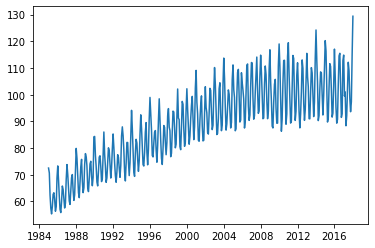

In [60]:
plt.plot(A)

<AxesSubplot:xlabel='DATE'>

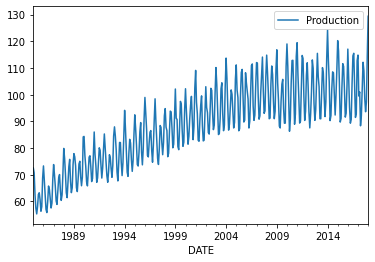

In [61]:
A.plot()

# Decomposition

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose
Q = seasonal_decompose(A,model='multiplicative')

In [63]:
original = Q.observed        #here we got original time series and store in  "original" variable.

In [64]:
trend = Q.trend              #here we got trend

In [65]:
season = Q.seasonal          #here we got season

In [66]:
Error = Q.resid             #here we got Error

<AxesSubplot:xlabel='DATE'>

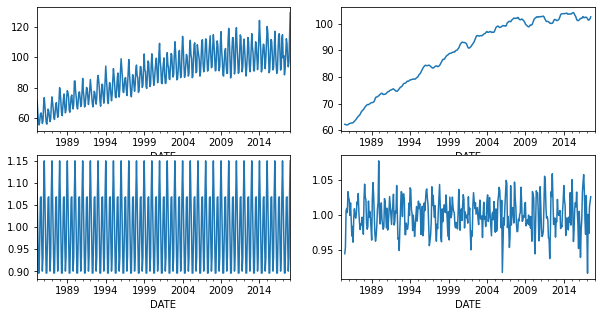

In [67]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
original.plot()
plt.subplot(2,2,2)
trend.plot()

plt.subplot(2,2,3)
season.plot()

plt.subplot(2,2,4)
Error.plot()

# Check stationarity of TS using rolling mean

In [68]:
RM = A.rolling(window=12).mean()

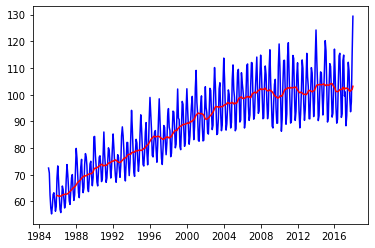

In [69]:
plt.plot(A,c="blue")
plt.plot(RM,c="red")

# Attempt 1 for stationary conversion

In [70]:
from numpy import log
LG = log(A)
LGRM = LG.rolling(window=12).mean()

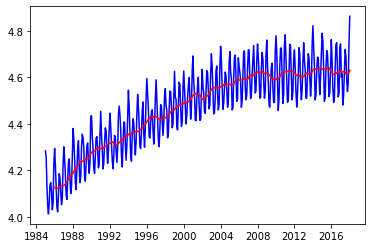

In [71]:
plt.plot(LG,c="blue")
plt.plot(LGRM,c="red")

# Attempt 2(square root)

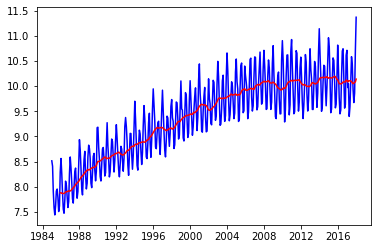

In [72]:
from numpy import sqrt
SR = sqrt(A)
SRRM = SR.rolling(window=12).mean()
plt.plot(SR,c="blue")
plt.plot(SRRM,c="red")

# Attempt 3(log-RM(log))

In [73]:
LG = log(A)
LGRM = LG.rolling(window=12).mean()

diff_LG_RM = LG-LGRM
RM_diff_LG_RM = diff_LG_RM.rolling(window=12).mean()

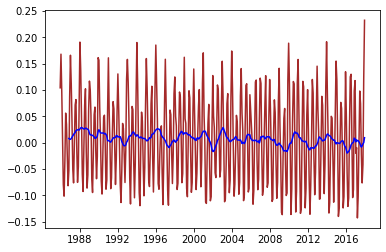

In [74]:
plt.plot(diff_LG_RM,c="brown")
plt.plot(RM_diff_LG_RM,c="blue")

# Divide Data in training and testing set

In [75]:
T = diff_LG_RM[diff_LG_RM.Production.isna()==False]

In [76]:
T.shape[0]*0.8   #spliting 

308.8

In [77]:
T = diff_LG_RM[diff_LG_RM.Production.isna()==False]

# Divide data training and testing set

In [78]:
trd = T[0:308]
tsd = T[308:]

In [79]:
trd.shape

(308, 1)

In [80]:
tsd.shape

(78, 1)

In [81]:
trd

,Production
DATE,
1985-12-01,0.103961
1986-01-01,0.167724
1986-02-01,0.095629
1986-03-01,0.007329
1986-04-01,-0.079115
1986-05-01,-0.101472
1986-06-01,-0.033363
1986-07-01,0.055963
1986-08-01,0.034639


In [82]:
tsd

,Production
DATE,
2011-08-01,0.105950
2011-09-01,-0.026286
2011-10-01,-0.123721
2011-11-01,-0.087143
2011-12-01,0.052772
2012-01-01,0.100455
2012-02-01,0.023736
2012-03-01,-0.070991
2012-04-01,-0.135795


# Create an autoregression forecasting model

In [83]:
from statsmodels.tsa.ar_model import AR
ar = AR(trd).fit()
pred = ar.predict(start="1994-04-01	",end="2018-01-01")

In [84]:
pred              #it is not properly predicted values because is in the form of log-RM
                  #we will convert into its original format.

1994-04-01   -0.079363
1994-05-01   -0.118623
1994-06-01   -0.023704
1994-07-01    0.078046
1994-08-01    0.057237
1994-09-01   -0.042562
1994-10-01   -0.104356
1994-11-01   -0.049459
1994-12-01    0.075369
1995-01-01    0.171450
1995-02-01    0.102926
1995-03-01    0.003064
1995-04-01   -0.085669
1995-05-01   -0.092565
1995-06-01    0.015327
1995-07-01    0.061372
1995-08-01    0.064083
1995-09-01   -0.009313
1995-10-01   -0.099678
1995-11-01   -0.044516
1995-12-01    0.073617
1996-01-01    0.160654
1996-02-01    0.114914
1996-03-01    0.014266
1996-04-01   -0.073037
1996-05-01   -0.095163
1996-06-01   -0.015899
1996-07-01    0.058632
1996-08-01    0.056309
1996-09-01   -0.062673
1996-10-01   -0.115171
1996-11-01   -0.059879
1996-12-01    0.084949
1997-01-01    0.153719
1997-02-01    0.108972
1997-03-01    0.000912
1997-04-01   -0.089468
1997-05-01   -0.085470
1997-06-01   -0.026679
1997-07-01    0.041223
1997-08-01    0.062136
1997-09-01   -0.037157
1997-10-01   -0.072919
1997-11-01 

# Conversion

In [85]:
LGRM.shape

(397, 1)

In [86]:
pred.index

DatetimeIndex(['1994-04-01', '1994-05-01', '1994-06-01', '1994-07-01',
               '1994-08-01', '1994-09-01', '1994-10-01', '1994-11-01',
               '1994-12-01', '1995-01-01',
               ...
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01'],
              dtype='datetime64[ns]', length=286, freq='MS')

In [87]:
LGRM_new = LGRM[LGRM.Production.isna()==False][308:]
Q1 = pd.DataFrame(pred)
Q1.columns =["Production"]

In [88]:
from numpy import exp
pred_final = exp(LGRM_new + Q1)

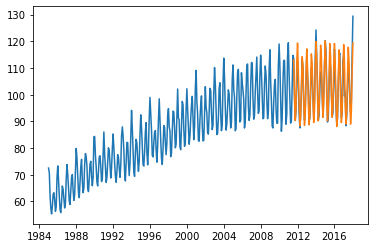

In [89]:
plt.plot(A)
plt.plot(pred_final)

In [90]:
A.tail()

,Production
DATE,
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


In [93]:
from statsmodels.tsa.ar_model import AR
ar = AR(trd).fit()
pred1 = ar.predict(end="01/01/2024")

# Prediction for 2019-2024

In [94]:
T = LGRM[LGRM.Production.isna()==False]

In [96]:
ar = AR(T).fit()
pred2 = ar.predict(end="01/01/2024")

In [97]:
pred1.head(2)

1987-04-01   -0.061530
1987-05-01   -0.078171
Freq: MS, dtype: float64

In [98]:
pred2.head(2)

1987-05-01    4.151861
1987-06-01    4.155852
Freq: MS, dtype: float64

In [99]:
pred2.shape

(441,)

In [100]:
pred1 = pred1[1:]

In [101]:
pred1.shape

(441,)

In [102]:
pred2.shape

(441,)

In [103]:
exp(pred1+pred2)

1987-05-01     58.773460
1987-06-01     63.218628
1987-07-01     69.035149
1987-08-01     67.561812
1987-09-01     64.728838
1987-10-01     59.580696
1987-11-01     62.061314
1987-12-01     69.990980
1988-01-01     75.778587
1988-02-01     74.889599
1988-03-01     68.286478
1988-04-01     63.223026
1988-05-01     61.745960
1988-06-01     66.428662
1988-07-01     72.108807
1988-08-01     72.789939
1988-09-01     67.921747
1988-10-01     62.469920
1988-11-01     64.873938
1988-12-01     72.560015
1989-01-01     81.541628
1989-02-01     75.650424
1989-03-01     70.802153
1989-04-01     64.573736
1989-05-01     63.361261
1989-06-01     69.552745
1989-07-01     74.899202
1989-08-01     76.289632
1989-09-01     68.299468
1989-10-01     64.736809
1989-11-01     66.462999
1989-12-01     76.081159
1990-01-01     85.894780
1990-02-01     80.634921
1990-03-01     73.850571
1990-04-01     66.405719
1990-05-01     65.780252
1990-06-01     70.508412
1990-07-01     77.421380
1990-08-01     76.957599
